In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [5]:
df = df.drop_duplicates(keep=False)

In [6]:
df_eda = df.copy()

In [7]:
# Converting Timestamp column into datetime

df_eda['Timestamp'] = pd.to_datetime(df_eda['Timestamp'])
df_eda['Timestamp'].dtypes

dtype('<M8[ns]')

In [8]:
df_eda['Timestamp'].dt.year.unique()

array([2016], dtype=int64)

In [9]:
df_eda['Timestamp'].dt.month.unique()

array([3, 4, 1, 6, 5, 7, 2], dtype=int64)

In [10]:
# Renaming "Unnamed: 0 column into ID column"
df_eda.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

In [11]:
# Renaming "Male" column into Gender column
df_eda.rename(columns={'Male':'Gender'}, inplace=True)

In [12]:
# Creating list of numerical and categorical columns
nums = [col for col in df_eda.columns if (df_eda[col].dtype == 'int64' or df_eda[col].dtype == 'float64') and col != 'ID' ]
cats = [col for col in df_eda.columns if df_eda[col].dtype == 'object']

In [13]:
# Descriptive stats for numerical features
df_eda[nums].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


In [14]:
# Descriptive stats for categorical features
df_eda[cats].describe()

,Gender,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


In [15]:
result = []
for col in df_eda.columns:
    result.append([col, df_eda[col].dtype, df_eda[col].isna().sum(), 100*df_eda[col].isna().sum()/len(df_eda[col]), df_eda[col].nunique(), df_eda[col].unique()[:5]])

output = pd.DataFrame(data=result, columns = 'column data_type no._null percent_null no._unique unique_sample'.split())
output

,column,data_type,no._null,percent_null,no._unique,unique_sample
0,ID,int64,0,0.0,1000,"[0, 1, 2, 3, 4]"
1,Daily Time Spent on Site,float64,13,1.3,890,"[68.95, 80.23, 69.47, 74.15, 68.37]"
2,Age,int64,0,0.0,43,"[35, 31, 26, 29, 23]"
3,Area Income,float64,13,1.3,987,"[432837300.0, 479092950.00000006, 418501580.0,..."
4,Daily Internet Usage,float64,11,1.1,955,"[256.09, 193.77, 236.5, 245.89, 225.58]"
5,Gender,object,3,0.3,2,"[Perempuan, Laki-Laki, nan]"
6,Timestamp,datetime64[ns],0,0.0,997,"[2016-03-27T00:53:00.000000000, 2016-04-04T01:..."
7,Clicked on Ad,object,0,0.0,2,"[No, Yes]"
8,city,object,0,0.0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Medan]"
9,province,object,0,0.0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim..."


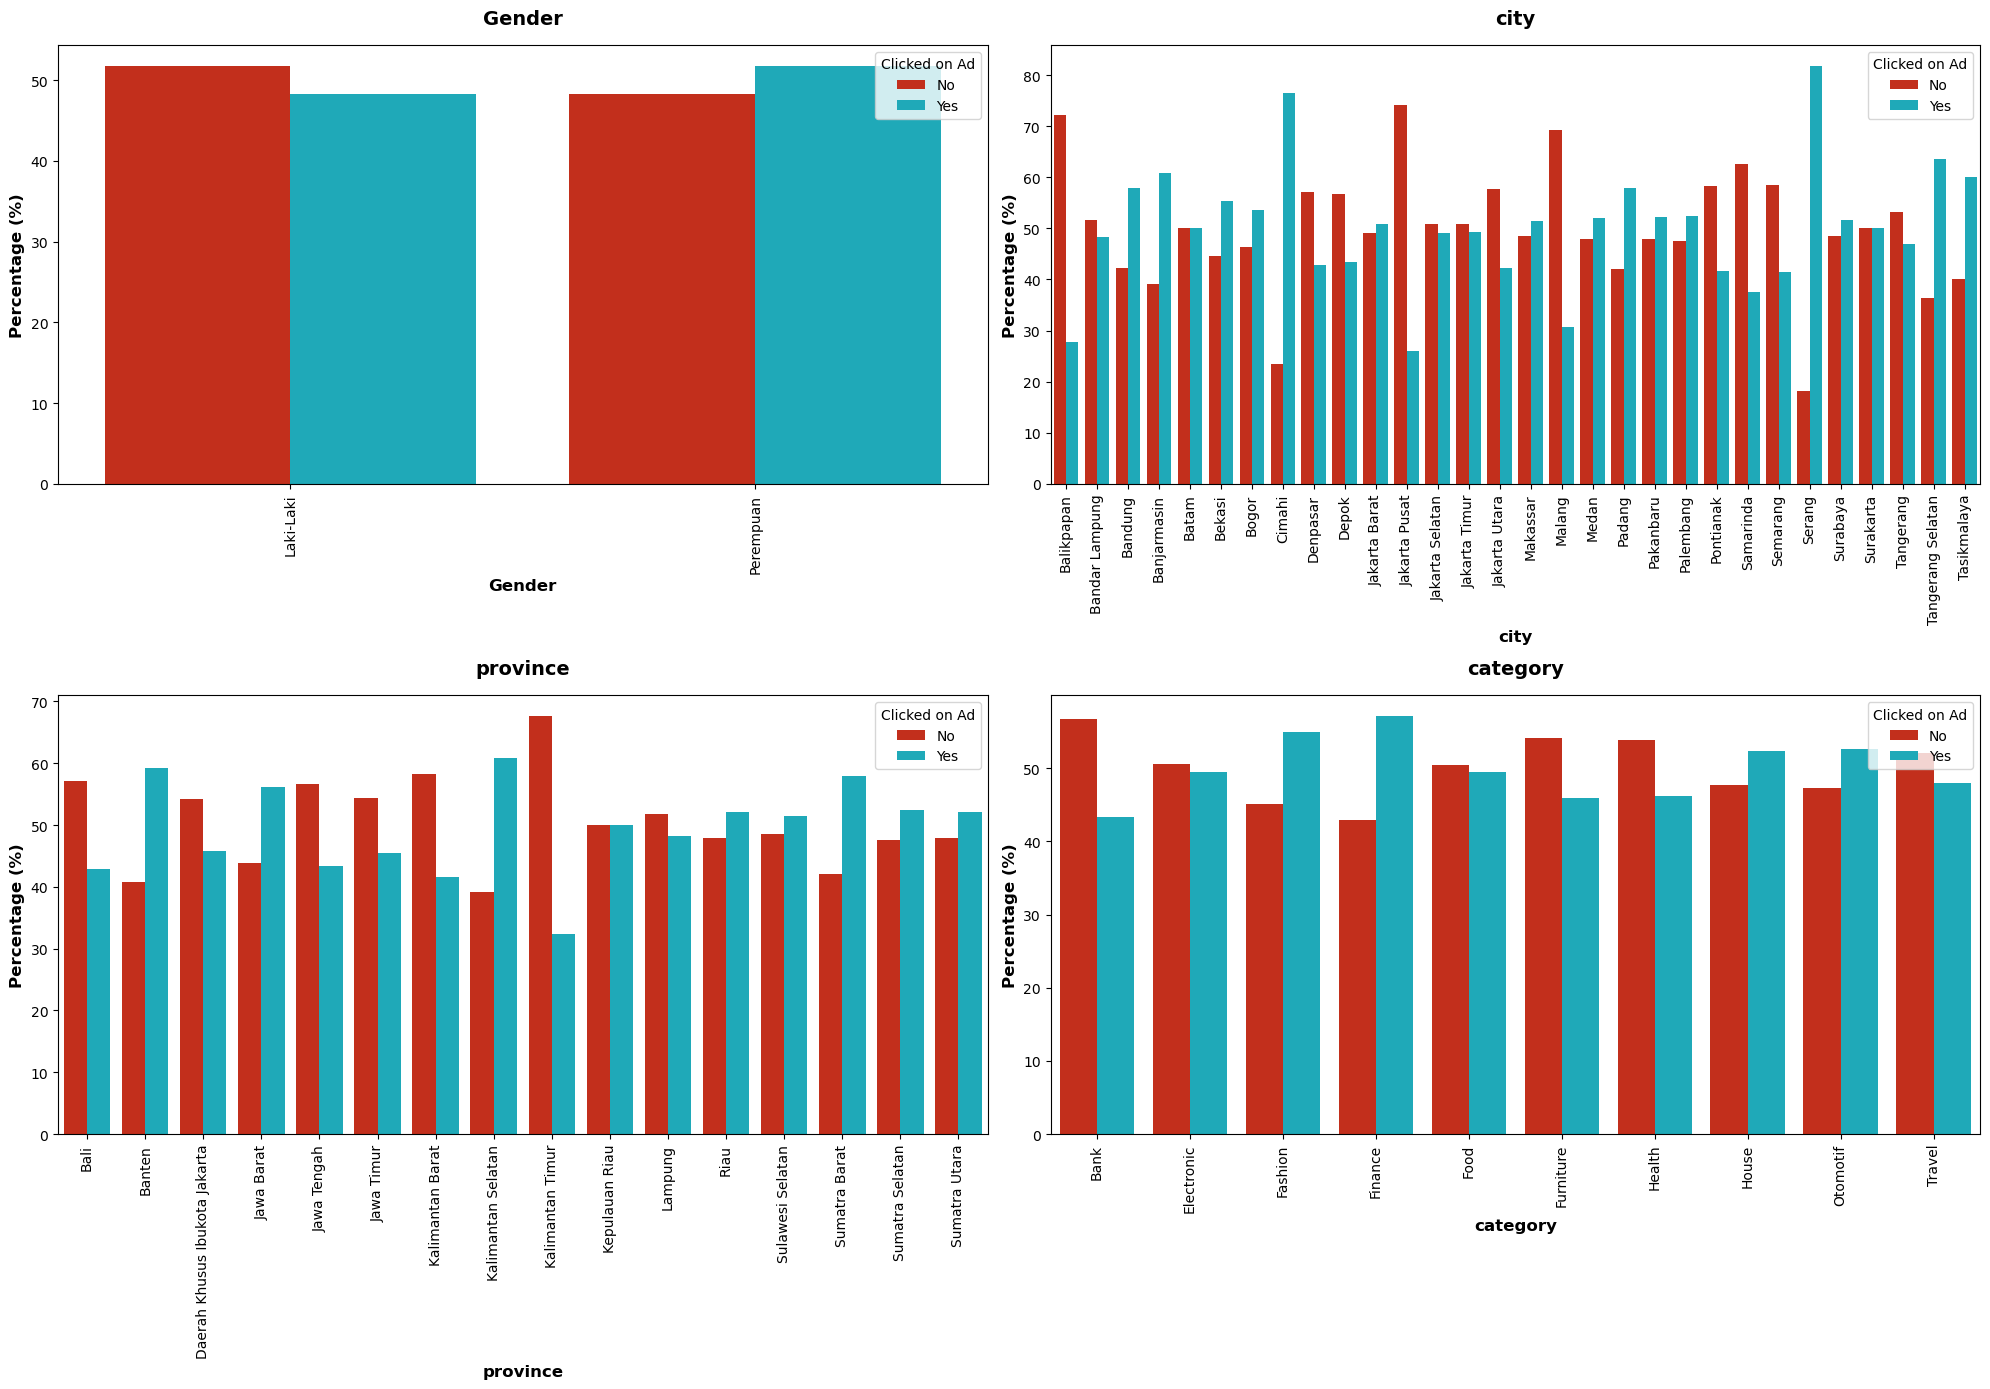

In [16]:
cats1=cats.copy()
cats1.remove('Clicked on Ad')
df_temp = df_eda.copy()
plt.figure(figsize=(20,14))
for i in range(len(cats1)):
    df_total = df_temp.groupby(cats1[i])['ID'].count().reset_index().rename(columns={'ID':'total'})
    df_subtotal = df_temp.groupby([cats1[i], 'Clicked on Ad'])['ID'].count().reset_index().rename(columns={'ID':'subtotal'})
    dfm = df_subtotal.merge(df_total, on=cats1[i])
    dfm['Percentage'] = round(dfm['subtotal']/dfm['total']*100, 2)

    plt.subplot(2, 2, i+1)
    sns.barplot(x = cats1[i], y='Percentage', data = dfm, palette = ['#de1a00', '#06bdd1'], hue='Clicked on Ad')
    plt.xticks(rotation=90)
    plt.xlabel(cats1[i], fontsize=12, fontweight = 'bold')
    plt.ylabel('Percentage (%)', fontsize=12, fontweight = 'bold')
    plt.title(f'{cats1[i]}', fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()

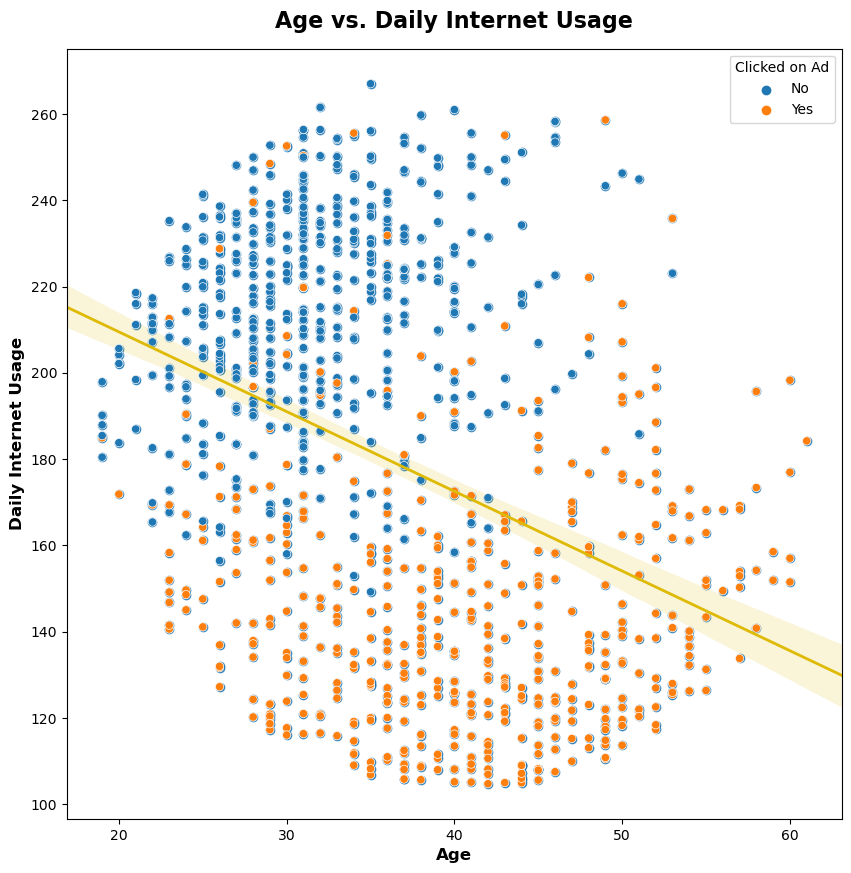

In [17]:
plt.figure(figsize=(10,10))
sns.regplot(data=df_eda, x="Age", y="Daily Internet Usage", truncate=False, line_kws={"linewidth": 2, 'color': '#deba04'})
sns.scatterplot(x = 'Age', y = 'Daily Internet Usage', data = df_eda, hue='Clicked on Ad')
plt.ylabel('Daily Internet Usage', fontsize=12, fontweight = 'bold')
plt.xlabel('Age', fontsize=12, fontweight = 'bold')
plt.title('Age vs. Daily Internet Usage', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

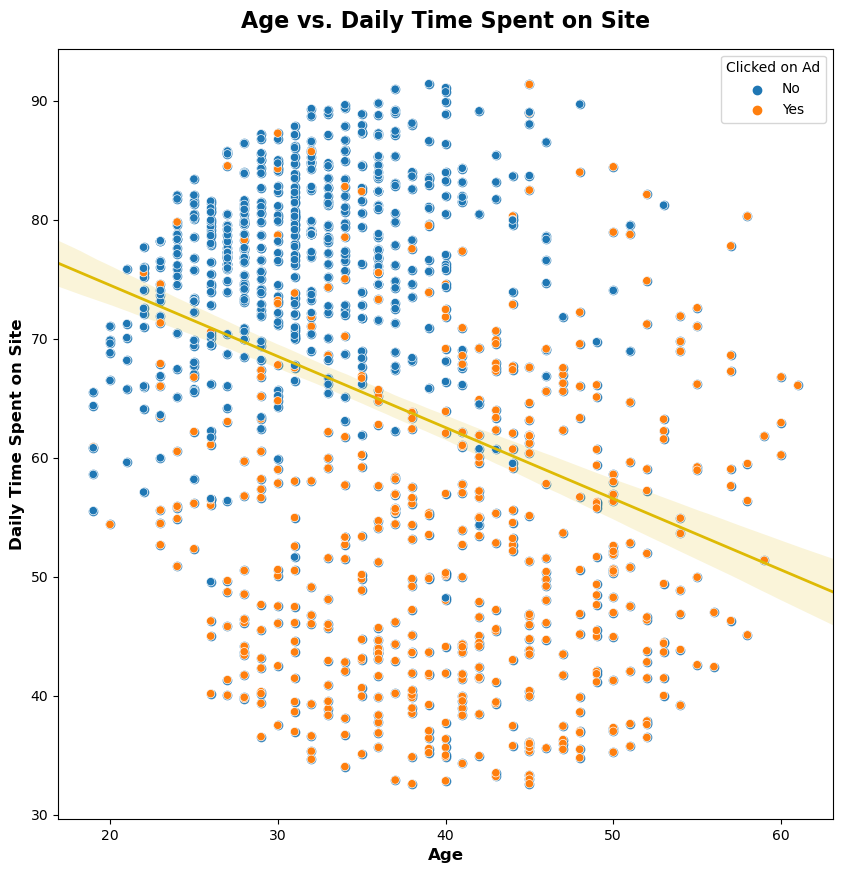

In [18]:
plt.figure(figsize=(10,10))
sns.regplot(data=df_eda, x="Age", y="Daily Time Spent on Site", truncate=False, line_kws={"linewidth": 2, 'color': '#deba04'})
sns.scatterplot(x = 'Age', y = 'Daily Time Spent on Site', data = df_eda, hue='Clicked on Ad')
plt.ylabel('Daily Time Spent on Site', fontsize=12, fontweight = 'bold')
plt.xlabel('Age', fontsize=12, fontweight = 'bold')
plt.title('Age vs. Daily Time Spent on Site', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

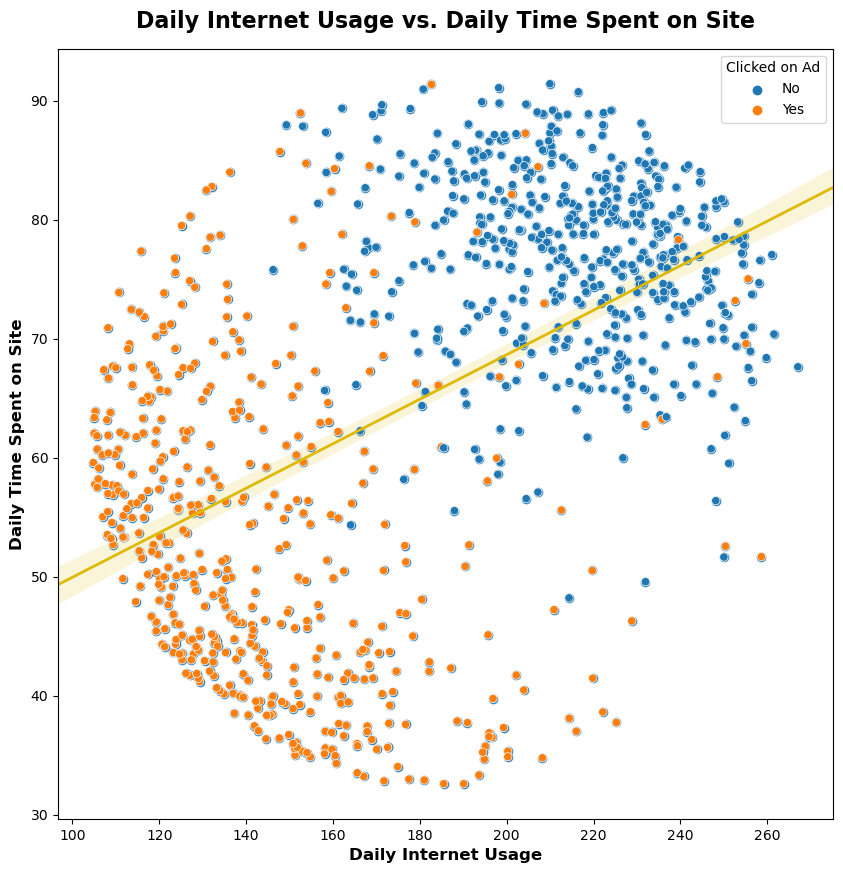

In [19]:
plt.figure(figsize=(10,10))
sns.regplot(data=df_eda, x="Daily Internet Usage", y="Daily Time Spent on Site", truncate=False, line_kws={"linewidth": 2, 'color': '#deba04'})
sns.scatterplot(x = 'Daily Internet Usage', y = 'Daily Time Spent on Site', data = df_eda, hue='Clicked on Ad')
plt.ylabel('Daily Time Spent on Site', fontsize=12, fontweight = 'bold')
plt.xlabel('Daily Internet Usage', fontsize=12, fontweight = 'bold')
plt.title('Daily Internet Usage vs. Daily Time Spent on Site', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

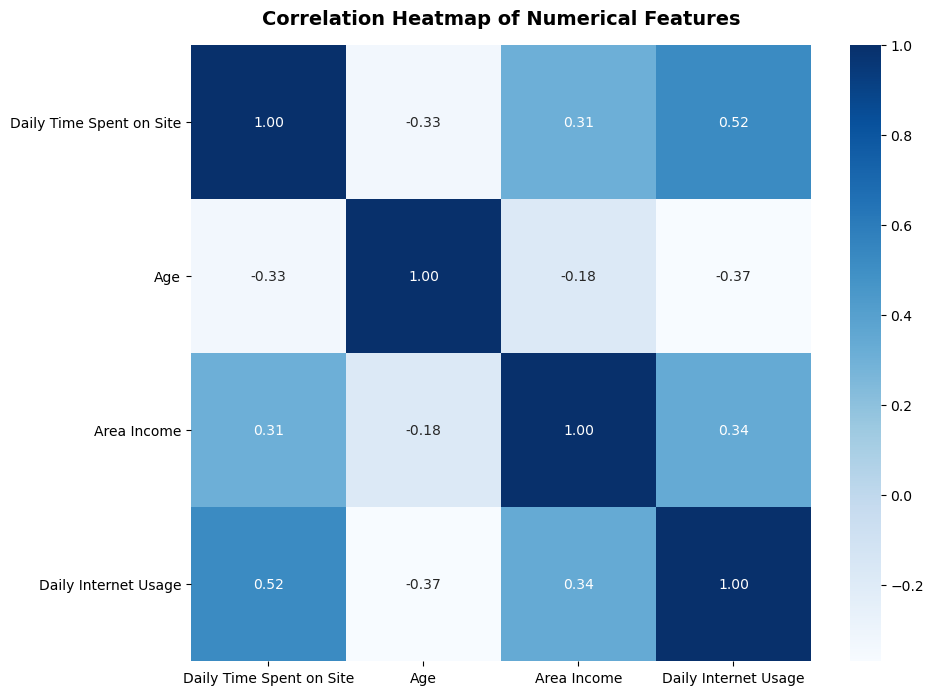

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_eda[nums].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold', pad=15)
plt.show()

In [21]:
df1 = df.copy()

In [22]:
# Creating list of numerical and categorical columns
nums = [col for col in df1.columns if (df1[col].dtype == 'int64' or df1[col].dtype == 'float64') and col != 'Unnamed: 0' ]
cats = [col for col in df1.columns if df1[col].dtype == 'object' and col != 'Timestamp']

In [23]:
result = []
for col in df1.columns:
    result.append([col, df1[col].dtype, df1[col].isna().sum(), 100*df1[col].isna().sum()/len(df1[col])])

output = pd.DataFrame(data=result, columns = 'column data_type no._null percent_null'.split())
output

,column,data_type,no._null,percent_null
0,Unnamed: 0,int64,0,0.0
1,Daily Time Spent on Site,float64,13,1.3
2,Age,int64,0,0.0
3,Area Income,float64,13,1.3
4,Daily Internet Usage,float64,11,1.1
5,Male,object,3,0.3
6,Timestamp,object,0,0.0
7,Clicked on Ad,object,0,0.0
8,city,object,0,0.0
9,province,object,0,0.0


In [24]:
# Imputing numerical features
df1['Area Income'].fillna(df1['Area Income'].median(), inplace=True)
df1['Daily Time Spent on Site'].fillna(df1['Daily Time Spent on Site'].mean(), inplace=True)
df1['Daily Internet Usage'].fillna(df1['Daily Internet Usage'].mean(), inplace=True)

# Imputing categorical features
df1['Male'].fillna(df1['Male'].mode()[0], inplace=True)

# Checking result
print(f'Total null values in dataset: {df1.isna().sum().sum()}')

Total null values in dataset: 0


In [25]:
print(f'Dataset contains duplicated values: {df1.duplicated().any()}')
print(f'Number of duplicates present in dataset: {df1.duplicated().sum()}')

Dataset contains duplicated values: False
Number of duplicates present in dataset: 0


In [26]:
# Extracting Year, Month, Week and Day from Timestamp feature

# Changing data type of Timestamp feature into datetime
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# Extracting Year
df1['Year'] = df1.Timestamp.dt.year

# Extracting Month
df1['Month'] = df1.Timestamp.dt.month

# Extracting Week
df1['Week'] = df1.Timestamp.dt.isocalendar().week

# Extracting Day
df1['Day'] = df1.Timestamp.dt.dayofweek

df1.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
247,247,57.05,41,351952230.0,179.86362,Laki-Laki,2016-01-09 03:45:00,Yes,Bekasi,Jawa Barat,Food,2016,1,1,5
751,751,77.75,31,413335370.0,240.64000,Laki-Laki,2016-06-22 17:19:00,No,Semarang,Jawa Tengah,House,2016,6,25,2
982,982,54.37,38,505374030.0,140.77000,Perempuan,2016-06-25 18:17:00,Yes,Tangerang,Banten,Otomotif,2016,6,25,5
543,543,63.80,38,252261310.0,108.70000,Laki-Laki,2016-03-19 00:27:00,Yes,Cimahi,Jawa Barat,Furniture,2016,3,11,5
603,603,78.36,24,412443080.0,196.77000,Laki-Laki,2016-06-24 21:09:00,No,Semarang,Jawa Tengah,Travel,2016,6,25,4


In [27]:
df1[df1['Week']==53].head(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
132,132,51.24,36,534578170.0,176.73,Perempuan,2016-01-03 16:01:00,Yes,Malang,Jawa Timur,Health,2016,1,53,6
180,180,39.85,38,219403730.0,145.96,Perempuan,2016-01-03 03:22:00,Yes,Semarang,Jawa Tengah,Fashion,2016,1,53,6
190,190,50.08,30,291409020.0,123.91,Perempuan,2016-01-03 05:34:00,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,1,53,6
337,337,75.32,28,419989500.0,233.60,Laki-Laki,2016-01-01 21:58:00,No,Bekasi,Jawa Barat,Fashion,2016,1,53,4
430,430,88.72,32,307093570.0,211.87,Laki-Laki,2016-01-03 17:10:00,No,Bogor,Jawa Barat,Health,2016,1,53,6


In [28]:
df1['Week'] = np.where(df1['Week'] == 53, 0, df1['Week'])
df1['Week'] = df1['Week'].astype(int)
df1[df1['Week']==0].head(3)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
132,132,51.24,36,534578170.0,176.73,Perempuan,2016-01-03 16:01:00,Yes,Malang,Jawa Timur,Health,2016,1,0,6
180,180,39.85,38,219403730.0,145.96,Perempuan,2016-01-03 03:22:00,Yes,Semarang,Jawa Tengah,Fashion,2016,1,0,6
190,190,50.08,30,291409020.0,123.91,Perempuan,2016-01-03 05:34:00,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,1,0,6


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1000 non-null   int64         
 1   Daily Time Spent on Site  1000 non-null   float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               1000 non-null   float64       
 4   Daily Internet Usage      1000 non-null   float64       
 5   Male                      1000 non-null   object        
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   object        
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  category                  1000 non-null   object        
 11  Year                      1000 non-null   int64         
 12  Month                

In [30]:
df1.rename(columns = {'Unnamed: 0':'ID', 'Male':'Gender'}, inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        1000 non-null   int64         
 1   Daily Time Spent on Site  1000 non-null   float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               1000 non-null   float64       
 4   Daily Internet Usage      1000 non-null   float64       
 5   Gender                    1000 non-null   object        
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   object        
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  category                  1000 non-null   object        
 11  Year                      1000 non-null   int64         
 12  Month                

In [31]:
# Creating list of numerical and categorical columns
nums = [col for col in df1.columns if (df1[col].dtype == 'int64' or df1[col].dtype == 'float64') and col != 'ID' and col != 'Year' and col != 'Month' and col != 'Week' and col != 'Day']
cats = [col for col in df1.columns if df1[col].dtype == 'object']

In [35]:
df1['Gender'].value_counts()

Perempuan    521
Laki-Laki    479
Name: Gender, dtype: int64

In [36]:
# Label encoding Gender feature
df1['Gender'] = np.where(df1['Gender'] == 'Laki-Laki', 1, 0)
df1['Gender'].value_counts()

0    521
1    479
Name: Gender, dtype: int64

In [37]:
df1['Clicked on Ad'].value_counts()

No     500
Yes    500
Name: Clicked on Ad, dtype: int64

In [38]:
# Label encoding Target feature
df1['Clicked on Ad'] = np.where(df1['Clicked on Ad'] == 'Yes', 1, 0)
df1['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [39]:
print(f"Unique values of category: {df1['category'].nunique()}")
print(f"Unique values of category: {df1['city'].nunique()}")
print(f"Unique values of category: {df1['province'].nunique()}")

Unique values of category: 10
Unique values of category: 30
Unique values of category: 16


In [40]:
pd.set_option('display.max_columns', None)

In [41]:
# One hot encoding
df1 = pd.get_dummies(df1, columns=['category'])
df1.head(3)

,ID,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,Year,Month,Week,Day,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,0,68.95,35,432837300.0,256.09,0,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,2016,3,12,6,0,0,0,0,0,1,0,0,0,0
1,1,80.23,31,479092950.0,193.77,1,2016-04-04 01:39:00,0,Denpasar,Bali,2016,4,14,0,0,0,0,0,1,0,0,0,0,0
2,2,69.47,26,418501580.0,236.50,0,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,2016,3,10,6,0,1,0,0,0,0,0,0,0,0


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        1000 non-null   int64         
 1   Daily Time Spent on Site  1000 non-null   float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               1000 non-null   float64       
 4   Daily Internet Usage      1000 non-null   float64       
 5   Gender                    1000 non-null   int32         
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   int32         
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  Year                      1000 non-null   int64         
 11  Month                     1000 non-null   int64         
 12  Week                 

In [49]:
df_clean = df1.select_dtypes(['float64', 'int64','uint8','int32'])
df_clean = df_clean.drop(columns=['ID', 'Year'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Gender                    1000 non-null   int32  
 5   Clicked on Ad             1000 non-null   int32  
 6   Month                     1000 non-null   int64  
 7   Week                      1000 non-null   int32  
 8   Day                       1000 non-null   int64  
 9   category_Bank             1000 non-null   uint8  
 10  category_Electronic       1000 non-null   uint8  
 11  category_Fashion          1000 non-null   uint8  
 12  category_Finance          1000 non-null   uint8  
 13  category_Food             1000 non-null   uint8  
 14  category_

In [50]:
df_clean.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender', 'Clicked on Ad', 'Month', 'Week',
       'Day', 'category_Bank', 'category_Electronic', 'category_Fashion',
       'category_Finance', 'category_Food', 'category_Furniture',
       'category_Health', 'category_House', 'category_Otomotif',
       'category_Travel'],
      dtype='object')

In [51]:
df_clean.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Gender                      0
Clicked on Ad               0
Month                       0
Week                        0
Day                         0
category_Bank               0
category_Electronic         0
category_Fashion            0
category_Finance            0
category_Food               0
category_Furniture          0
category_Health             0
category_House              0
category_Otomotif           0
category_Travel             0
dtype: int64

In [52]:
#del df['id']
#del df['Unnamed: 32']

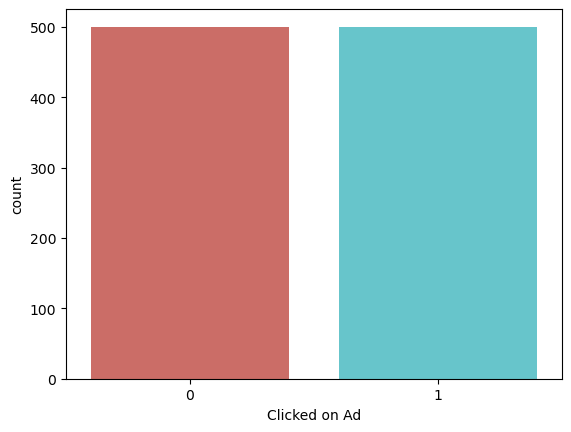

In [54]:
sns.countplot(x='Clicked on Ad',data=df_clean, palette='hls')
plt.show()
#plt.savefig('count_plot')

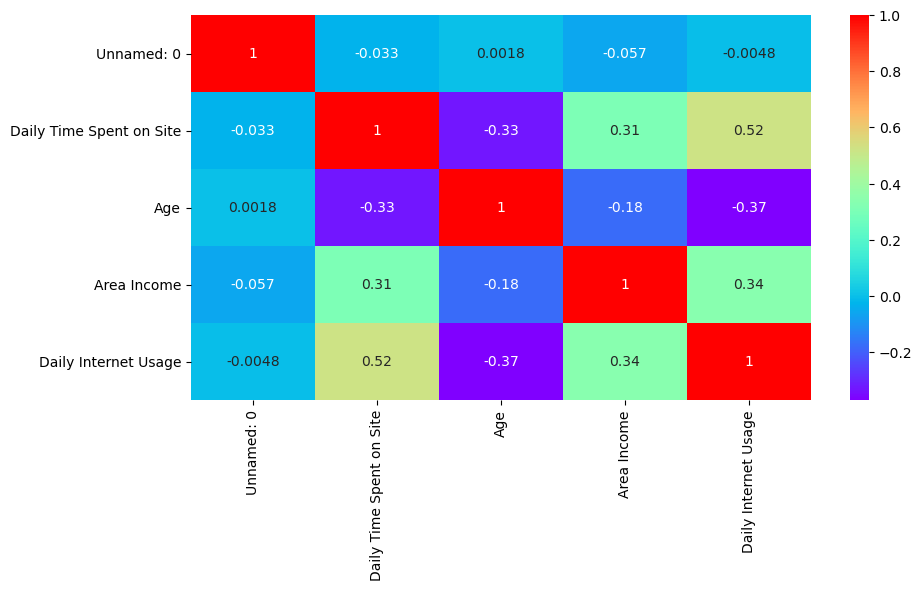

In [55]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.show()

In [ ]:
# Import label encoder 
#from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
#label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
#df['diagnosis']= label_encoder.fit_transform(df['diagnosis']) 

#df['diagnosis'].unique() 

In [56]:
X = df_clean.drop(["Clicked on Ad"],axis =1)
y = df_clean["Clicked on Ad"]

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((800, 18), (800,), (200, 18), (200,))

In [58]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score,roc_auc_score,matthews_corrcoef

In [82]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
auc = []
mcc = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    auc.append(round(e,3))
    mcc.append(round(f,3))

# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
lr.fit(X_train, y_train)

y_pred    = lr.predict(X_valid)

lr_acc = accuracy_score(y_pred, y_valid)
lr_prec = precision_score(y_pred, y_valid,average='weighted')
lr_rec = recall_score(y_pred, y_valid,average='weighted')
lr_f1 = f1_score(y_pred, y_valid,average='weighted')
lr_auroc = roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1])
lr_mcc = matthews_corrcoef(y_pred, y_valid)

In [83]:
storeResults('Logistic Regression',lr_acc,lr_prec,lr_rec,lr_f1,lr_auroc,lr_mcc)

# MLP

In [62]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')
mlp.fit(X_train, y_train)

y_pred    = mlp.predict(X_valid)

mlp_acc = accuracy_score(y_pred, y_valid)
mlp_prec = precision_score(y_pred, y_valid,average='weighted')
mlp_rec = recall_score(y_pred, y_valid,average='weighted')
mlp_f1 = f1_score(y_pred, y_valid,average='weighted')
mlp_auroc = roc_auc_score(y_train, mlp.predict_proba(X_train)[:, 1])
mlp_mcc = matthews_corrcoef(y_pred, y_valid)

In [84]:
storeResults('MLP',mlp_acc,mlp_prec,mlp_rec,mlp_f1,mlp_auroc,mlp_mcc)

# Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_samples_leaf=20,criterion="entropy", max_depth=3,random_state=10)
dt.fit(X_train, y_train)

y_pred    = dt.predict(X_valid)

dt_acc = accuracy_score(y_pred, y_valid)
dt_prec = precision_score(y_pred, y_valid,average='weighted')
dt_rec = recall_score(y_pred, y_valid,average='weighted')
dt_f1 = f1_score(y_pred, y_valid,average='weighted')
dt_auroc = roc_auc_score(y_train, dt.predict_proba(X_train)[:, 1])
dt_mcc = matthews_corrcoef(y_pred, y_valid)

In [85]:
storeResults('Decision Tree',dt_acc,dt_prec,dt_rec,dt_f1,dt_auroc,dt_mcc)

# Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_valid)

rf_acc = accuracy_score(y_pred, y_valid)
rf_prec = precision_score(y_pred, y_valid,average='weighted')
rf_rec = recall_score(y_pred, y_valid,average='weighted')
rf_f1 = f1_score(y_pred, y_valid,average='weighted')
rf_auroc = roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])
rf_mcc = matthews_corrcoef(y_pred, y_valid)

In [86]:
storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1,rf_auroc,rf_mcc)

# KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred    = knn.predict(X_valid)

knn_acc = accuracy_score(y_pred, y_valid)
knn_prec = precision_score(y_pred, y_valid,average='weighted')
knn_rec = recall_score(y_pred, y_valid,average='weighted')
knn_f1 = f1_score(y_pred, y_valid,average='weighted')
knn_auroc = roc_auc_score(y_train, knn.predict_proba(X_train)[:, 1])
knn_mcc = matthews_corrcoef(y_pred, y_valid)

In [87]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1,knn_auroc,knn_mcc)

# SVM

In [70]:
from sklearn import svm
svc = svm.SVC(probability=True, C=1.0, kernel = "rbf", gamma=0.1)
svc.fit(X_train, y_train)

y_pred    = svc.predict(X_valid)

svc_acc = accuracy_score(y_pred, y_valid)
svc_prec = precision_score(y_pred, y_valid,average='weighted')
svc_f1 = f1_score(y_pred, y_valid,average='weighted')
svc_rec = recall_score(y_pred, y_valid,average='weighted')
svc_auroc = roc_auc_score(y_train, svc.predict_proba(X_train)[:, 1])
svc_mcc = matthews_corrcoef(y_pred, y_valid)

In [88]:
storeResults('SVM',svc_acc,svc_prec,svc_rec,svc_f1,svc_auroc,svc_mcc)

# GuassianNB

In [72]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred    = nb.predict(X_valid)

nb_acc = accuracy_score(y_pred, y_valid)
nb_prec = precision_score(y_pred, y_valid,average='weighted')
nb_f1 = f1_score(y_pred, y_valid,average='weighted')
nb_rec = recall_score(y_pred, y_valid,average='weighted')
nb_auroc = roc_auc_score(y_train, nb.predict_proba(X_train)[:, 1])
nb_mcc = matthews_corrcoef(y_pred, y_valid)

In [89]:
storeResults('GaussianNB',nb_acc,nb_prec,nb_rec,nb_f1,nb_auroc,nb_mcc)

# Extension

In [78]:
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier

clf1 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)
clf2 = ExtraTreesClassifier(random_state=10)

model = VotingClassifier(estimators=[('bag', clf1), ('dt', clf2)], voting='soft')
model.fit(X_train, y_train)

y_pred    = model.predict(X_valid)

vot_acc = accuracy_score(y_pred, y_valid)
vot_prec = precision_score(y_pred, y_valid,average='weighted')
vot_rec = recall_score(y_pred, y_valid,average='weighted')
vot_f1 = f1_score(y_pred, y_valid,average='weighted')
vot_auroc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
vot_mcc = matthews_corrcoef(y_pred, y_valid)

In [90]:
storeResults('Extension',vot_acc,vot_prec,vot_rec,vot_f1,vot_auroc,vot_mcc)

# Comparison

In [91]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score,
                       'AUC-Score' : auc,
                       'MCC' : mcc
                      }) 

In [92]:
result

,ML Model,Accuracy,Precision,Recall,F1_score,AUC-Score,MCC
0,Logistic Regression,0.445,1.000,0.445,0.616,0.786,0.000
1,MLP,0.445,1.000,0.445,0.616,0.500,0.000
2,Decision Tree,0.920,0.920,0.920,0.920,0.984,0.838
3,Random Forest,0.945,0.946,0.945,0.945,1.000,0.889
4,KNN,0.630,0.636,0.630,0.629,0.898,0.267
5,SVM,0.445,1.000,0.445,0.616,0.000,0.000
6,GaussianNB,0.655,0.692,0.655,0.657,0.786,0.341
7,Extension,1.000,1.000,1.000,1.000,1.000,1.000


# Modelling

In [93]:
import joblib
filename = 'model.sav'
joblib.dump(model, filename)

['model.sav']

# Graph

In [94]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

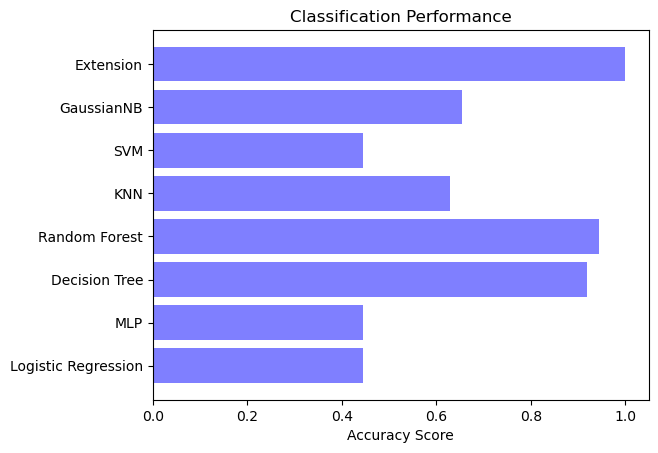

In [95]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

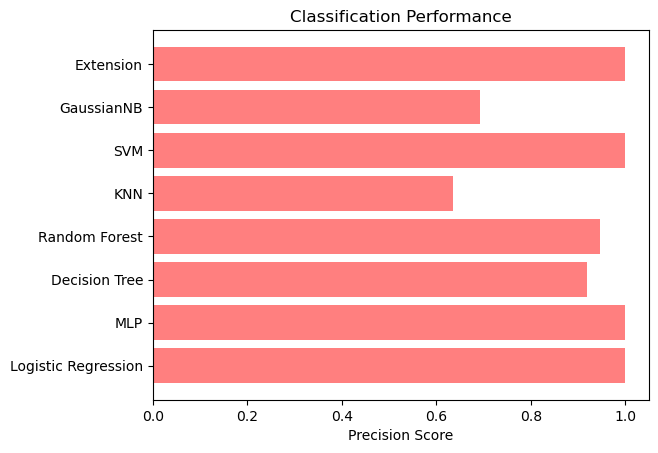

In [96]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

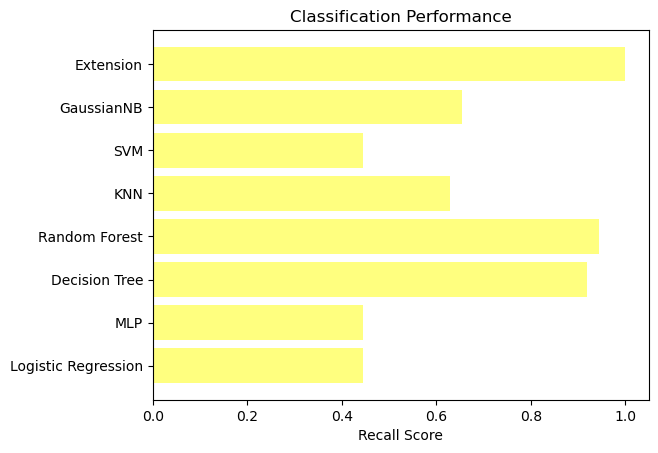

In [97]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

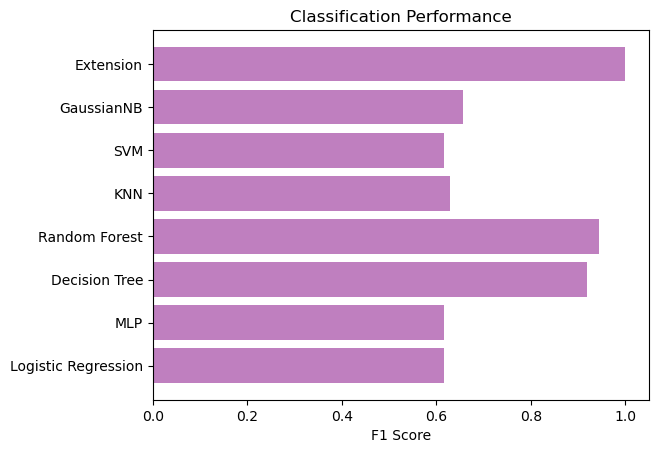

In [98]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='purple')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# AUC Score

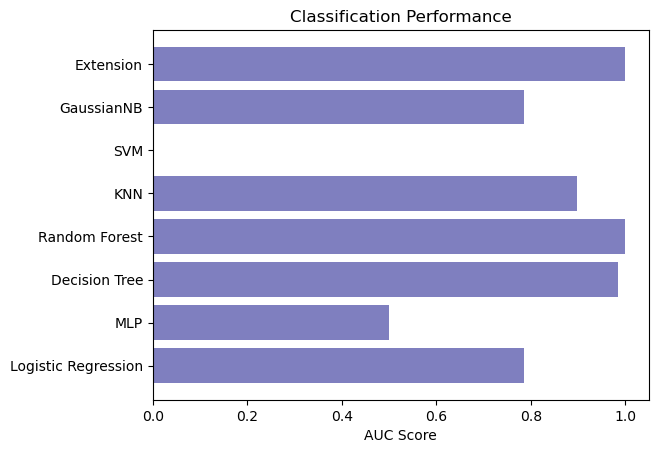

In [99]:
plt2.barh(y_pos, auc, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('AUC Score')
plt2.title('Classification Performance')
plt2.show()

# MCC

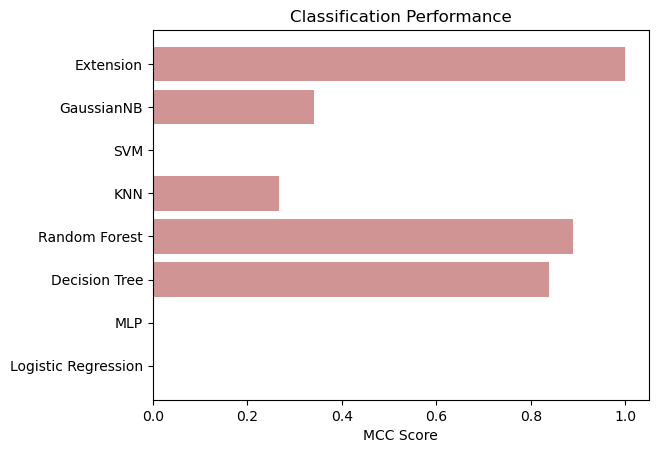

In [100]:
plt2.barh(y_pos, mcc, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MCC Score')
plt2.title('Classification Performance')
plt2.show()